In [373]:
import pandas as pd
import re
import numpy as np
import statistics as stat
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [374]:
pip install --upgrade statistics

Requirement already up-to-date: statistics in c:\users\mkdty\anaconda3\lib\site-packages (1.0.3.5)Note: you may need to restart the kernel to use updated packages.



In [375]:
def outlier(col):
    for i in cars.make_model.unique():
        for j in cars.Displacement.unique():
            for k in cars.hp.unique():
                    x = cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)]
                    cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)] = np.log(x)


In [376]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, np.percentile)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [377]:
#outlier_zscore(cars,"km")

In [378]:
pd.set_option('display.max_rows', 999)

In [379]:
from scipy.stats import zscore

In [380]:
def numerization(x):
    return [re.sub('\D', '', i) if i is not None else '' for i in x] 
#scout['km']=numerization(scout['km'])
#scout['km']=pd.to_numeric(scout['km'])

In [381]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 
# limit değerinden yüksek oranda missing value içeren sütunları sergiler. 
# örneğin limit = 35 ise yüzde 35'den fazla missing value içeren sütunları görmenizi sağlar.

In [382]:
def warranty(x):
    if type(x) == list :
        return x[0]
    elif x == "\n":
        return None
    else: return x
    

In [383]:
def fix_column(x):
    if type(x) == list:
        return " ".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [384]:
def fix_column1(x):
    if type(x) == list:
        return ",".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [385]:
def fill_mode(data,column):
    mod1 = stats.mode(data.loc[cars[column].notnull(),column])
    mod = stats.mode(data[column])
    if mod is not np.nan:
        data[column] = data[column].fillna(mod)
    else:
        data[column] = data[column].fillna(mod1)
    return data[column] 

In [386]:
def fill_mean(data,column):
    mod1 = data.loc[cars[column].notnull(),column].mean()
    mod = data[column].mean()
    if mod is not np.nan:
        data[column] = data[column].fillna(mod)
    else:
        data[column] = data[column].fillna(mod1)
    return data[column] 

In [387]:
# NaN ihtiva eden sütunları aynı marka-modelde olan diğer araçların mode'u ile dolduran fonksyion.
def fill_most_model(x, y):
    a = cars[x][cars['make_model'] == y].value_counts().index[0]
    b = cars[x][cars['make_model'] == y]
    b = b.apply(lambda z : z if isinstance(z, list) else a)
    cars[x][cars['make_model'] == y] = b
#x = doldurmak istediğimiz sütun
#y = marka-model ismi    

In [388]:
def unique_values(item):    # we return list values to string
    return item[1] if type(item) == list else item


In [389]:
def fill_most(x):
    if type(x) == list:
        return " ".join([i for i in x])
    else: return x

In [390]:
cars = pd.read_json("scout_car.json",lines=True)
cars.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

## DROP COLUMNS

In [391]:
pd.set_option("display.max_columns",54)

In [392]:
cars.drop("url",axis=1,inplace=True)

In [393]:
cars.drop(["Electricity consumption","Last Service Date","Other Fuel Types","Availability","Last Timing Belt Service Date","kW"
           ,"Make","Model","Non-smoking Vehicle","Next Inspection","Inspection new","Model Code" ],inplace=True,axis=1)

In [394]:
cars.drop("Available from",inplace=True,axis=1)

In [395]:
cars.drop("prev_owner",inplace=True,axis=1)

In [396]:
cars.drop("null",inplace=True,axis=1)

In [397]:
show_nans(cars,45)

Full Service       48.395000
Emission Label     74.967021
Country version    52.346253
dtype: float64

## Firts Registration

In [398]:
cars["First Registration"] = cars["First Registration"].astype(str)
cars["First Registration"] = cars["First Registration"].str.extract("(\d\d\d\d)")
#fill_mode(cars,"First Registration")
cars["First Registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [399]:
cars["First Registration"].isnull().sum()

1597

In [400]:
cars["First Registration"].fillna(method="bfill",inplace=True)
cars["First Registration"] =cars["First Registration"].astype(int)
cars["First Registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914    2019
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: int32

In [401]:
#cars["Age"] = 2020 - cars["First Registration"]

In [402]:
#cars["Age"]

## ------------------------------------------------------------------------------

## COLUMN KM AND COLUMN TYPE

In [403]:
cars["Type"] # all values we need in index 1

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [404]:
cars["Type"].isnull().sum()

2

In [405]:
cars["Types"] = cars["Type"].apply(lambda x: x[1] if x is not np.nan else x)
cars["Types"].unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered',
       nan], dtype=object)

In [406]:
cars.Types

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Types, Length: 15919, dtype: object

In [407]:
cars[cars["Types"]=="New"]["First Registration"].value_counts()# new cars should have 0 km
# new cars usually have 2019 registration date

2019    1435
2018     164
2017      35
2016      16
Name: First Registration, dtype: int64

In [408]:
cars["Types"].isnull().sum()

2

In [409]:
cars["Types"].fillna(method="bfill",inplace=True)

In [410]:
cars.drop("Type",inplace=True,axis=1)

# km column

In [411]:
cars[cars["km"]=='- km']["km"].count()

1024

In [412]:
cars["km"] =cars["km"].transform(lambda x: np.nan if x == "- km" else x)  # new cars should have 0 km


In [413]:
cars["km"]

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914          NaN
15915     9,900 km
15916        15 km
15917        10 km
15918          NaN
Name: km, Length: 15919, dtype: object

In [414]:
cars["km"]=cars["km"].str.replace('km', "", regex=True) # We cleaned the "km" column return int value to use with other values
cars["km"] = cars["km"].str.replace(",","",regex=True)


In [415]:
cars["km"].value_counts() 

10        1045
1          367
5          170
50         148
100        139
          ... 
5711         1
23290        1
12250        1
13440        1
96721        1
Name: km, Length: 6689, dtype: int64

In [416]:
cars["km"]=cars["km"].str.strip() # we cut whitespace
cars["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914      NaN
15915     9900
15916       15
15917       10
15918      NaN
Name: km, Length: 15919, dtype: object

In [417]:
cars["km"] = cars["km"].apply(lambda x : int(x) if x is not np.nan else x)


In [418]:
cars.groupby("First Registration")["km"].mean()

First Registration
2016    77201.420211
2017    41387.179837
2018    17663.518858
2019     1717.983102
Name: km, dtype: float64

In [419]:
cars.groupby(["make_model","First Registration"])["km"].transform("mean") 
#we fill nan values with mean by previous owners

0        54074.397152
1        25526.550228
2        54074.397152
3        54074.397152
4        54074.397152
             ...     
15914     1653.962963
15915     1653.962963
15916     1653.962963
15917     1653.962963
15918     1653.962963
Name: km, Length: 15919, dtype: float64

In [420]:
cars["km"].fillna(cars.groupby(["make_model","First Registration"])["km"].transform("mean") ,inplace=True)

In [421]:
cars["km"].dtype

dtype('float64')

In [422]:
cars["km"].isnull().sum()

1

In [423]:
cars["km"].fillna(method="bfill",inplace=True)


In [424]:
cars["km"] = cars["km"].astype(int)

In [425]:
cars["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914     1653
15915     9900
15916       15
15917       10
15918     1653
Name: km, Length: 15919, dtype: int32

In [426]:
#cars.groupby("First Registration")["km"].mean()

## relationship between km and price

In [427]:
cars["km"].corr(cars["price"])

-0.39780279994401885

Text(0.5, 1.0, 'PRİCE BY KM')

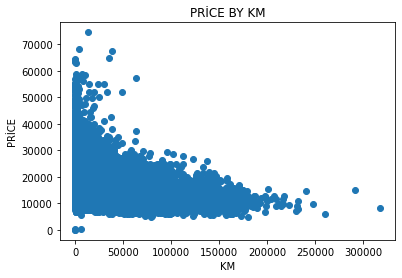

In [428]:
import matplotlib.pyplot as plt
plt.scatter(cars["km"],cars["price"])
plt.xlabel("KM")
plt.ylabel("PRİCE")
plt.title("PRİCE BY KM")


In [429]:
import seaborn as sns

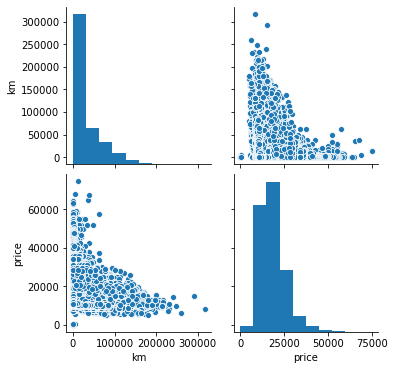

In [430]:
sns.pairplot(cars[["km","price"]])

In [431]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Types
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,01/2016,66 kW,\n2\n,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,Used
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,03/2017,141 kW,NaN,NaN,NaN,NaN,2017,"[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,Used
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,02/2016,85 kW,\n1\n,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,Used
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,08/2016,66 kW,\n1\n,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,2016,"[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,Used
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,05/2016,66 kW,\n1\n,"[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[\nC1626\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...","[\n, Technik & Sicherheit:, Xenon plu

## Previous owner column cleaning

In [432]:
cars["Previous Owners"]=cars["Previous Owners"].apply(lambda x: x[0] if type(x)==list else x)

In [433]:
cars["Previous Owners"]=cars["Previous Owners"].str.replace("\n","").str.strip() 
cars["Previous Owners"].head(5)

0      2
1    NaN
2      1
3      1
4      1
Name: Previous Owners, dtype: object

In [434]:
cars["Previous Owners"].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: Previous Owners, dtype: int64

In [435]:
cars["Previous Owners"].fillna(method="bfill",inplace=True)

In [436]:
#cats = [4,3,2,1,0]
#cars["Previous Owners"] = cars["Previous Owners"].astype("category",cats)
#cars["Previous Owners"].dtype
#Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.

#cats1 = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
#cars["Previous Owners"]= cars["Previous Owners"].astype(cats1)
#cars["Previous Owners"].dtype

In [437]:
cars["Previous Owners"]

0        2
1        1
2        1
3        1
4        1
        ..
15914    1
15915    1
15916    1
15917    1
15918    1
Name: Previous Owners, Length: 15919, dtype: object

In [438]:
cars["Previous Owners"].isnull().sum()

0

In [439]:
cars["Previous Owners"].value_counts()

1    14169
2     1179
0      531
3       38
4        2
Name: Previous Owners, dtype: int64

In [440]:
cars.groupby(["Types","make_model"] )["Previous Owners"].value_counts()
#new cars must not be used before. we need to replace "1" with "0"

Types           make_model      Previous Owners
Demonstration   Audi A1         1                   132
                                0                     3
                Audi A3         1                    59
                                2                     2
                                0                     1
                Opel Astra      1                   163
                                0                     1
                                2                     1
                Opel Corsa      1                    86
                                2                     2
                                0                     1
                Opel Insignia   1                   170
                                0                     2
                Renault Clio    1                    74
                                0                     1
                                2                     1
                Renault Espace  1                    90


In [441]:
cars.groupby("First Registration")["Previous Owners"].value_counts()

First Registration  Previous Owners
2016                1                  3098
                    2                   556
                    0                    24
                    3                    18
                    4                     1
2017                1                  2845
                    2                   429
                    0                    22
                    3                    18
                    4                     1
2018                1                  4474
                    2                   175
                    0                    46
                    3                     2
2019                1                  3752
                    0                   439
                    2                    19
Name: Previous Owners, dtype: int64

In [442]:
cars.groupby("Previous Owners")["km"].mean()

Previous Owners
0     6929.086629
1    32161.806055
2    43738.495335
3    49694.447368
4    38350.000000
Name: km, dtype: float64

In [443]:
def unique_values(item):    # we return list values to string
    return item[1] if type(item) == list else item
#cars["Fuel"].apply(unique_values).value_counts()

In [444]:
#cars_new.registration.apply(lambda x: x.toordinal())


# Fuel

In [445]:
cars["Fuel"].apply(lambda x: type(x)).unique() # all values in this column have list type

array([<class 'list'>], dtype=object)

In [446]:
cars["Fuel"]

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [447]:
cars["Fuel"].isnull().sum()

0

In [448]:
cars["Fuel"] = cars["Fuel"].apply(lambda x: x[1] if x is not np.nan else x)
#all values that we need in first index

In [449]:
cars["Fuel"]

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Fuel, Length: 15919, dtype: object

In [450]:
cars[cars["Fuel"].str.contains("Diesel")]["Fuel"]

0        Diesel (Particulate Filter)
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
5        Diesel (Particulate Filter)
                    ...             
15911    Diesel (Particulate Filter)
15912    Diesel (Particulate Filter)
15914    Diesel (Particulate Filter)
15916                         Diesel
15917                         Diesel
Name: Fuel, Length: 7299, dtype: object

In [451]:
len(cars[cars["Fuel"].str.contains("CNG")]["Fuel"]) # ı think we can define lpg and cng as benzine

36

In [452]:
len(cars[cars["Fuel"].str.contains("LPG")]["Fuel"])

26

In [453]:
cars["Fuel"].unique()

array(['Diesel (Particulate Filter)', 'Gasoline', 'Super 95',
       'Regular/Benzine 91', 'Diesel',
       'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
       'Super E10 95', 'Super 95 (Particulate Filter)',
       'Super 95 / Regular/Benzine 91',
       'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95',
       'Super 95 / Regular/Benzine 91 / Super Plus 98',
       'Super 95 / Super Plus 98 / Super E10 95',
       'Super 95 / Super Plus 98',
       'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
       'Others', 'Super 95 / Super E10 95',
       'Gasoline (Particulate Filter)',
       'Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)',
       'Regular/Benzine E10 91',
  

In [454]:
def fuel(item):
    x = item[1] if type(item) == list else item
   
    if "diesel" in x.lower():
        return "diesel"
    
    else:
        return "benzin"

In [455]:
cars["Fuel"]=cars["Fuel"].apply(fuel)

In [456]:
cars["Fuel"].unique()

array(['diesel', 'benzin'], dtype=object)

In [457]:
cars["Fuel"].isnull().sum()

0

In [458]:
cars["Fuel"] = cars["Fuel"].astype("category")
cars["Fuel"].dtype

CategoricalDtype(categories=['benzin', 'diesel'], ordered=False)

## body color

In [459]:
def unique_values(item):    # we return list values to string
    return item[1] if type(item) == list else item

In [460]:
cars["Body Color"]

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body Color, Length: 15919, dtype: object

In [461]:
cars["Body Color"].apply(lambda x: type(x)).unique() #contains of nan values and list values  

array([<class 'list'>, <class 'float'>], dtype=object)

In [462]:
cars["Body Color"] = cars["Body Color"].apply(unique_values)
#we got the values from the list convert string type

In [463]:
cars["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [464]:
cars["Body Color"].isnull().sum()

597

In [465]:
cars.groupby("make_model")["Body Color"].value_counts(dropna=False)
#each model usually have black or grey color

make_model      Body Color
Audi A1         White         727
                Black         717
                Grey          327
                Blue          286
                Red           250
                Silver        130
                NaN            73
                Green          32
                Yellow         31
                Brown          22
                Beige          17
                Violet          2
Audi A2         Grey            1
Audi A3         Black         938
                Grey          721
                White         692
                Silver        297
                Blue          235
                Red           108
                NaN            73
                Brown          25
                Yellow          4
                Bronze          2
                Orange          1
                Violet          1
Opel Astra      Black         550
                Grey          540
                Silver        433
                White

In [466]:
cars["body_color"]= cars.groupby("make_model")["Body Color"].bfill()

In [467]:
cars["body_color"].isnull().sum()

0

In [468]:
#cars["Body Color"].fillna(value=None,method="bfill",limit=300,inplace=True)
#cars["Body Color"].fillna(value=None,method="ffill",limit=300,inplace=True)

In [469]:
#cars["Body Color"].fillna(cars.groupby("make_model")["Body Color"].transform(lambda x: x.fillna(x.mode())),inplace=True)

In [470]:
show_nans(cars,35)

Full Service       48.395000
Paint Type         36.258559
Cylinders          35.680633
Weight             43.809285
Drive chain        43.080596
Emission Label     74.967021
Country version    52.346253
dtype: float64

In [471]:
cars.drop(["Body Color"],axis=1,inplace=True)

## CARS PAİNT TYPE & BODY COLOR ORİGİNAL

In [472]:
def list_to_str(x):
    if type(x) == list:
        return " ".join([i for i in x])
    else: return x

In [473]:
cars["Paint Type"]

0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint Type, Length: 15919, dtype: object

In [474]:
cars["Paint Type"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [475]:
cars["Paint Type"] = cars["Paint Type"].apply(list_to_str).str.replace("\n","")

In [476]:
cars["Paint Type"].isnull().sum()

5772

In [477]:
paint = cars["Paint Type"]
paint.value_counts()

Metallic       9794
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [478]:
cars.groupby("make_model")["Paint Type"].value_counts(dropna=False)

make_model      Paint Type 
Audi A1         Metallic       1742
                NaN             808
                Uni/basic        63
                Perl effect       1
Audi A2         Metallic          1
Audi A3         Metallic       1792
                NaN            1208
                Uni/basic        97
Opel Astra      Metallic       1713
                NaN             785
                Uni/basic        26
                Perl effect       2
Opel Corsa      Metallic       1281
                NaN             883
                Uni/basic        53
                Perl effect       2
Opel Insignia   Metallic       1780
                NaN             795
                Uni/basic        23
Renault Clio    NaN             925
                Metallic        861
                Uni/basic        52
                Perl effect       1
Renault Duster  NaN              17
                Uni/basic        16
                Metallic          1
Renault Espace  Metallic        623


In [479]:
cars["Paint Type"]= cars.groupby("make_model")["Paint Type"].ffill()
cars["Paint Type"].isnull().sum()
# fill values by model

7

In [480]:
cars["Paint Type"].fillna("Metallic",inplace=True)

In [481]:
cars["Paint Type"].isnull().sum()

0

In [482]:
#ars["Paint Type"].fillna(method="bfill",limit=300).isnull().sum()

# fixing column name

In [483]:
cars = cars.rename(columns={"\nComfort & Convenience\n": "Comfort & Convenience", 
"\nEntertainment & Media\n": "Entertainment & Media","\nExtras\n":"Extra","\nSafety & Security\n":"Safety & Security"})

In [484]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,description,Emission Label,Gears,Country version,Types,body_color
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,01/2016,66 kW,2,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,Used,Black
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,03/2017,141 kW,1,NaN,NaN,NaN,2017,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,Used,Red
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,02/2016,85 kW,1,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,Used,Black
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,08/2016,66 kW,1,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,2016,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,Used,Brown
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,05/2016,66 kW,1,"[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[\nC1626\n],2016,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...","[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],Used,Black


## cars registration

In [485]:
cars["registration"]

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914        -/-
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [486]:
cars["registration"].unique()

array(['01/2016', '03/2017', '02/2016', '08/2016', '05/2016', '03/2016',
       '06/2017', '05/2018', '09/2016', '06/2016', '10/2016', '04/2016',
       '06/2018', '11/2017', '07/2016', '12/2016', '09/2018', '04/2018',
       '07/2017', '02/2017', '11/2016', '01/2018', '05/2017', '04/2017',
       '07/2018', '01/2017', '02/2018', '03/2018', '-/-', '08/2017',
       '10/2017', '08/2018', '09/2017', '12/2017', '04/2019', '12/2018',
       '03/2019', '06/2019', '05/2019', '02/2019', '01/2019', '10/2018',
       '11/2018', '09/2019', '07/2019', '08/2019', '11/2019', '12/2019'],
      dtype=object)

In [487]:
cars["registration"].isnull().sum()

0

In [488]:
cars["registration"] = cars["registration"].apply(lambda x: np.nan if x == "-/-"else x)

In [489]:
cars["registration"].isnull().sum()

1597

In [490]:
cars.groupby(["make_model" ,"First Registration"])["registration"].value_counts(dropna=False)
# we can fill nan values by make_model and registration

make_model      First Registration  registration
Audi A1         2016                02/2016         114
                                    03/2016         112
                                    04/2016          97
                                    05/2016          56
                                    06/2016          49
                                    01/2016          45
                                    10/2016          38
                                    12/2016          36
                                    07/2016          35
                                    09/2016          19
                                    08/2016          14
                                    11/2016          14
                                    NaN               3
                2017                02/2017          60
                                    05/2017          60
                                    03/2017          57
                                    06/2017          48

In [491]:
cars["registration"]=cars.groupby(["make_model" ,"First Registration"])["registration"].bfill()

In [492]:
cars["registration"].fillna(method="ffill",inplace=True)

In [493]:
cars["registration"].isnull().sum()

0

In [494]:
cars["registration"] = pd.to_datetime(cars["registration"])

In [495]:
c = pd.Timestamp('2019-12-01')-cars["registration"]
a = c.dt.days//30


c 

0       1430 days
1       1005 days
2       1399 days
3       1217 days
4       1309 days
           ...   
15914    334 days
15915    334 days
15916    275 days
15917    183 days
15918    334 days
Name: registration, Length: 15919, dtype: timedelta64[ns]

In [496]:
cars.registration.dt.dayofweek

0        4
1        2
2        0
3        0
4        6
        ..
15914    1
15915    1
15916    4
15917    5
15918    1
Name: registration, Length: 15919, dtype: int64

In [497]:
#pd.DataFrame(c.dt.days/365).apply(np.ceil)

In [498]:
cars["age_as_year"]=pd.DataFrame(c.dt.days/365).round(1)

In [499]:
cars["age_as_month"]=a

In [500]:
cars["age_as_month"].dtype

dtype('int64')

In [501]:
cars.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,description,Emission Label,Gears,Country version,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66 kW,2,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,Used,Black,3.9,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,NaN,NaN,NaN,2017,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,Used,Black,3.8,46


# 	Warranty column

In [502]:
#Nan_to_list(cars,"Warranty")
#unique_values1(cars,"Warranty")

In [503]:
cars["Warranty"] = cars["Warranty"].apply(warranty)

In [504]:
cars["Warranty"]

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917             None
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [505]:
cars["Warranty"] = cars["Warranty"].str.replace("\n","") # we remove "\n" values

In [506]:
NaN_rows = cars["Warranty"]=="" # to fill rows with "" values, we determine a condition

In [507]:
cars.loc[cars.isnull().any(axis=1),"hp"]

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15904, dtype: object

In [508]:

cars.loc[NaN_rows, "Warranty"] = cars.loc[NaN_rows, "Warranty"].apply(lambda x: np.nan)
# we filled

In [509]:
cars["Warranty"] = cars["Warranty"].str.replace("months","") # to cover str to int remove "months" strings

In [510]:
cars["Warranty"].isnull().sum()

11066

In [511]:
warranty = pd.Timestamp('2019-12-01')-cars["registration"] 
warranty = warranty.dt.days//30

warranty = 36 -warranty
warranty

0       -11
1         3
2       -10
3        -4
4        -7
         ..
15914    25
15915    25
15916    27
15917    30
15918    25
Name: registration, Length: 15919, dtype: int64

In [512]:
cars["Warranty"].fillna(warranty,inplace=True)

In [513]:
cars["Warranty"] = cars["Warranty"].astype(int)

In [514]:
cars["Warranty"] = cars["Warranty"].apply(lambda x: 0 if x < 0 else x)

In [515]:
cars["Warranty"]

0         0
1         3
2         0
3         0
4         0
         ..
15914    24
15915    25
15916    27
15917    30
15918    25
Name: Warranty, Length: 15919, dtype: int64

# show nan values

In [516]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 
# limit değerinden yüksek oranda missing value içeren sütunları sergiler. 
# örneğin limit = 35 ise yüzde 35'den fazla missing value içeren sütunları görmenizi sağlar.

In [517]:
# önce bu çalıştırılarak nan içeren değerler boş listelere çevrilmeli ki diğer fonksiyon'da kullandığımız set() 
#fonksiyonu işe yarasın.
def Nan_to_list(data, column_name):
    NaN_rows = data[column_name].isnull()
    # Change the type of NaNs from 'float' to (empty) 'list'
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [518]:
# unique değerleri sergilemek için yukardaki fonksiyondan sonra bunu çalıştırmanız yeterli olucaktır.
def unique_values1(data, column_name):
    unique_vals = set()
    for rows in data[column_name]:
        unique_vals.update(rows)
    return list(unique_vals)

In [519]:
def CO2(x):
    if type(x) == list:
        return x[0]

In [520]:
cars["CO2 Emission"].isnull().sum()

1808

# CO2

In [521]:
cars["CO2 Emission"]

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object

In [522]:
cars["CO2 Emission"].value_counts(dropna=False)

NaN                             1808
[\n120 g CO2/km (comb)\n]        740
[[], [], []]                     628
[\n99 g CO2/km (comb)\n]         545
[\n97 g CO2/km (comb)\n]         537
[\n104 g CO2/km (comb)\n]        501
[\n102 g CO2/km (comb)\n]        477
[\n103 g CO2/km (comb)\n]        445
[\n114 g CO2/km (comb)\n]        382
[\n124 g CO2/km (comb)\n]        372
[\n107 g CO2/km (comb)\n]        362
[\n108 g CO2/km (comb)\n]        362
[\n119 g CO2/km (comb)\n]        361
[\n106 g CO2/km (comb)\n]        349
[\n128 g CO2/km (comb)\n]        329
[\n126 g CO2/km (comb)\n]        282
[\n85 g CO2/km (comb)\n]         275
[\n118 g CO2/km (comb)\n]        270
[\n110 g CO2/km (comb)\n]        266
[\n127 g CO2/km (comb)\n]        257
[\n117 g CO2/km (comb)\n]        254
[\n111 g CO2/km (comb)\n]        237
[\n113 g CO2/km (comb)\n]        235
[\n109 g CO2/km (comb)\n]        234
[\n139 g CO2/km (comb)\n]        224
[\n140 g CO2/km (comb)\n]        218
[\n129 g CO2/km (comb)\n]        213
[

In [523]:
cars["CO2 Emission"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [524]:
cars["CO2 Emission"].apply(lambda x: len(x) if x is not np.nan else x).unique()

array([ 1., nan,  3.])

In [525]:
cars["CO2 Emission"].apply(CO2).apply(lambda x: type(x)).unique()

array([<class 'str'>, <class 'NoneType'>, <class 'list'>], dtype=object)

In [526]:
cars["CO2 Emission"].apply(CO2).str.extract("(\d\d\d|\d\d)")

,0
0,99
1,129
2,99
3,99
4,109
...,...
15914,139
15915,168
15916,139
15917,139


In [527]:
# co2 func
cars["CO2 Emission"] = cars["CO2 Emission"].apply(CO2).str.extract("(\d\d\d|\d\d)")


In [528]:
cars["CO2 Emission"].unique()

array(['99', '129', '109', '92', '98', '97', nan, '105', '112', '103',
       '102', '95', '104', '91', '94', '117', '123', '106', '108', '121',
       '107', '101', '113', '137', '100', '116', '114', '118', '331',
       '115', '119', '90', '136', '134', '110', '111', '120', '89', '142',
       '126', '122', '128', '127', '138', '130', '125', '85', '124',
       '152', '88', '189', '194', '149', '153', '188', '36', '060', '96',
       '990', '146', '135', '158', '12', '141', '172', '154', '150',
       '167', '174', '93', '133', '131', '145', '147', '156', '87', '148',
       '139', '151', '144', '168', '160', '170', '80', '132', '155', '14',
       '159', '143', '140', '82', '84', '165', '51', '157', '169', '166',
       '253', '164', '175', '190', '161', '239', '197', '184', '199',
       '13', '187', '181', '186', '177', '180', '162', '45', '171', '183',
       '191', '193'], dtype=object)

In [529]:
cars["CO2 Emission"] = cars["CO2 Emission"].astype(float)

In [530]:
cars["Fuel"].value_counts(dropna=False)

benzin    8619
diesel    7300
Name: Fuel, dtype: int64

In [531]:
cars.groupby(["Fuel","make_model"])["CO2 Emission"].mean()

Fuel    make_model    
benzin  Audi A1           106.337107
        Audi A2                  NaN
        Audi A3           115.453791
        Opel Astra        123.108507
        Opel Corsa        129.667204
        Opel Insignia     140.161708
        Renault Clio      122.461014
        Renault Duster    177.000000
        Renault Espace    155.902542
diesel  Audi A1           100.100840
        Audi A2                  NaN
        Audi A3           106.306723
        Opel Astra        105.848875
        Opel Corsa         99.455556
        Opel Insignia     132.546485
        Renault Clio       89.529897
        Renault Duster           NaN
        Renault Espace    124.425243
Name: CO2 Emission, dtype: float64

In [532]:
cars["CO2 Emission"]=cars.groupby(["Fuel","make_model"])["CO2 Emission"].ffill()

In [533]:
cars["CO2 Emission"].fillna(method="bfill",inplace=True)


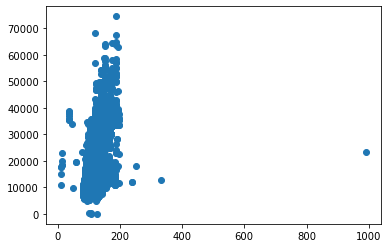

In [534]:
cars["CO2 Emission"] =  cars["CO2 Emission"].astype(int)
plt.scatter(cars["CO2 Emission"],cars["price"])

In [535]:
cars["CO2 Emission"].corr(cars["price"])

0.33477119541975703

# drop column

In [536]:
cars.head()
cars.Extra.isnull().sum()

2962

In [537]:
show_nans(cars,35)

Full Service       48.395000
Cylinders          35.680633
Weight             43.809285
Drive chain        43.080596
Emission Label     74.967021
Country version    52.346253
dtype: float64

# important

In [538]:
#cars[cars["Extra"].notnull()]["Extra"].apply(lambda x: ",".join(x[:]) ).str.get_dummies(",")

# drop unuseless columns

In [539]:
cars.drop(["Offer Number","Country version" ],inplace=True,axis=1)

In [540]:
cars.drop("Full Service",axis=1,inplace=True)

In [541]:
cars.drop("description",inplace=True,axis=1)

In [542]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66 kW,2,0,2016,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,Used,Black,3.9,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,3,2017,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66 kW,1,0,2016,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,2016-05-01,66 kW,1,0,2016,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,Black,3.6,43


# Consumption column

In [543]:
import re

In [544]:
def consumption(x):
    
    if type(x) == list and type(x[0])==list : 
        return ",".join(x[0]+x[1]+x[2])
    elif type(x)==list and len(x)>3:
        return ",".join(x)
            
    

In [545]:
from collections import Iterable
def flatten(lis):
    if isinstance(lis, str):
        yield lis
    elif lis is np.nan:
        return np.nan
    else:
        for item in lis:
            if isinstance(item, Iterable) and not isinstance(item, str):
                for x in flatten(item):
                     yield x
            else:
                 yield item
#return from nested list to one dimensional list                   

In [546]:
cars["Consumption"].value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]               244
[[4.5 l/100 km (comb)], [5.7 l/100 km (city)], [3.8 l/100 km (country)]]               214
[[4.4 l/100 km (comb)], [5.2 l/100 km (city)], [3.9 l/100 km (country)]]               213
[[3.3 l/100 km (comb)], [3.5 l/100 km (city)], [3.1 l/100 km (country)]]               210
[[4 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]                 201
[[5 l/100 km (comb)], [6.3 l/100 km (city)], [4.2 l/100 km (country)]]                 196

In [547]:
cars["Consumption"].apply(flatten).apply(lambda x: list(x))

0        [3.8 l/100 km (comb), 4.3 l/100 km (city), 3.5...
1        [5.6 l/100 km (comb), 7.1 l/100 km (city), 4.7...
2        [3.8 l/100 km (comb), 4.4 l/100 km (city), 3.4...
3        [3.8 l/100 km (comb), 4.3 l/100 km (city), 3.5...
4        [4.1 l/100 km (comb), 4.6 l/100 km (city), 3.8...
                               ...                        
15914    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15917    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15918    [6.8 l/100 km (comb), 8.7 l/100 km (city), 5.7...
Name: Consumption, Length: 15919, dtype: object

In [548]:
#cars["Consumption"].apply(lambda x: x[0]+x[1]+x[3] if type(x) == list else x )
cars["Consumption"].apply(consumption).sample(55)

6747     3.5 l/100 km (comb),4 l/100 km (city),3.3 l/10...
9855     \n,6.3 l/100 km (comb),\n,7.8 l/100 km (city),...
4390            4.8 l/100 km (comb),4.2 l/100 km (country)
14538    5 l/100 km (comb),6.3 l/100 km (city),4.2 l/10...
4213     4 l/100 km (comb),4.7 l/100 km (city),3.6 l/10...
10010    6 l/100 km (comb),7.8 l/100 km (city),4.9 l/10...
8036     3 l/100 km (comb),4 l/100 km (city),3 l/100 km...
11552    5.7 l/100 km (comb),7.3 l/100 km (city),4.8 l/...
7619     \n,5.8 l/100 km (comb),\n,7.4 l/100 km (city),...
6198     5.5 l/100 km (comb),7.5 l/100 km (city),4.3 l/...
2814                                   3.9 l/100 km (comb)
6072     3.5 l/100 km (comb),4 l/100 km (city),3.2 l/10...
10159    6.6 l/100 km (comb),8.2 l/100 km (city),5.6 l/...
7307     4.6 l/100 km (comb),5.7 l/100 km (city),3.9 l/...
2659     4.7 l/100 km (comb),5.7 l/100 km (city),4.1 l/...
14802                                    5 l/100 km (comb)
3321     4.8 l/100 km (comb),5.5 l/100 km (city),4.4 l/.

In [549]:
cons=cars["Consumption"].apply(consumption)
#we catch the string values 

In [550]:
cons=cons.str.strip("\n,")
cons=cons.str.replace("\n,","")

In [551]:
cons1 = cons.str.extract("(\d+.\d*|\d+).*,(\d+.\d*|\d+).*,(\d+.\d*|\d+)")

In [552]:
cons1

,0,1,2
0,3.8,4.3,3.5
1,5.6,7.1,4.7
2,3.8,4.4,3.4
3,3.8,4.3,3.5
4,4.1,4.6,3.8
...,...,...,...
15914,5.3,6.2,4.7
15915,7.4,9.2,6.3
15916,5.3,6.2,4.7
15917,5.3,6.2,4.7


In [553]:
cons1.isnull().sum()

0    2555
1    2555
2    2555
dtype: int64

In [554]:
cons2 =cons.str.extract("(\d+.\d*|\d+)")
# we just catch comb values. since it is the average of the other two columns, comb column is enough for us

In [555]:
cons2

,0
0,3.8
1,5.6
2,3.8
3,3.8
4,4.1
...,...
15914,5.3
15915,7.4
15916,5.3
15917,5.3


In [556]:
cons2.isnull().sum()

0    1906
dtype: int64

In [557]:
cars["Consumption"].str[1].value_counts(dropna=False)

NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
[4.3 l/100 km (city)]       512
[5.1 l/100 km (city)]       470
[6.8 l/100 km (city)]       442
[4.6 l/100 km (city)]       417
[7.2 l/100 km (city)]       397
[5.7 l/100 km (city)]       365
[7.3 l/100 km (city)]       354
[4.2 l/100 km (city)]       353
[5.9 l/100 km (city)]       344
[7.8 l/100 km (city)]       341
[6.6 l/100 km (city)]       337
[5.2 l/100 km (city)]       333
[4.1 l/100 km (city)]       320
[6.3 l/100 km (city)]       317
[4 l/100 km (city)]         300
[5.4 l/100 km (city)]       289
[4.7 l/100 km (city)]       288
[6.7 l/100 km (city)]       286
[3.9 l/100 km (city)]       245
[6 l/100 km (city)]         239
[3.5 l/100 km (city)]       230
[7.6 l/100 km (city)]       227
[7.1 l/100 km (city)]       221
[7.5 l/100 km (city)]       217
[6.9 l/100 km (city)]       215
[5.5 l/100 km (city)]       207
[6.2 l/1

In [558]:
cars["Consumption"].sample(100)

10115    [[6.6 l/100 km (comb)], [8.2 l/100 km (city)],...
6345     [[5.4 l/100 km (comb)], [7.1 l/100 km (city)],...
4957     [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
5614     [[5.5 l/100 km (comb)], [6.9 l/100 km (city)],...
13856    [[3.3 l/100 km (comb)], [3.5 l/100 km (city)],...
10157    [[6.9 l/100 km (comb)], [8.7 l/100 km (city)],...
13204    [[5.4 l/100 km (comb)], [6.8 l/100 km (city)],...
14380    [[5.4 l/100 km (comb)], [6.8 l/100 km (city)],...
14982    [[], [5 l/100 km (city)], [4.4 l/100 km (count...
12636    [[5.5 l/100 km (comb)], [7 l/100 km (city)], [...
11656    [[5.8 l/100 km (comb)], [7.5 l/100 km (city)],...
10273    [[5.8 l/100 km (comb)], [7.3 l/100 km (city)],...
1635     [[5.1 l/100 km (comb)], [6.5 l/100 km (city)],...
15059    [[4.6 l/100 km (comb)], [5 l/100 km (city)], [...
6496     [[3.6 l/100 km (comb)], [4.2 l/100 km (city)],...
14943    [[4.6 l/100 km (comb)], [5 l/100 km (city)], [...
13386    [[3.5 l/100 km (comb)], [3.9 l/100 km (city)],.

In [559]:
cars["Consumption"].str[0].value_counts(dropna=False)

NaN                       1906
\n                         850
[3.9 l/100 km (comb)]      732
[4 l/100 km (comb)]        712
[5.4 l/100 km (comb)]      662
[5.1 l/100 km (comb)]      627
[4.4 l/100 km (comb)]      595
[3.8 l/100 km (comb)]      585
[5.6 l/100 km (comb)]      568
[4.7 l/100 km (comb)]      555
[4.8 l/100 km (comb)]      523
[5 l/100 km (comb)]        513
[4.5 l/100 km (comb)]      511
[5.2 l/100 km (comb)]      429
[4.6 l/100 km (comb)]      420
[4.2 l/100 km (comb)]      408
[5.3 l/100 km (comb)]      374
[3.7 l/100 km (comb)]      369
[4.9 l/100 km (comb)]      348
[5.5 l/100 km (comb)]      342
[4.1 l/100 km (comb)]      341
[5.9 l/100 km (comb)]      308
[5.7 l/100 km (comb)]      302
[3.3 l/100 km (comb)]      298
[4.3 l/100 km (comb)]      295
[3.5 l/100 km (comb)]      285
[6 l/100 km (comb)]        278
[3.6 l/100 km (comb)]      193
[6.2 l/100 km (comb)]      184
[5.8 l/100 km (comb)]      142
[6.3 l/100 km (comb)]      141
[6.1 l/100 km (comb)]      135
[6.8 l/1

In [560]:
cons2[0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4 ', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3 ', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6',
       '4.8', '5 ', '5.8', '4.7', '43 ', '13.8', '6 ', '5.9', '51 ',
       '5.3', '5.5', '10 ', '3.3', '3.2', '6.6', '8.3', '6.5', '7.1',
       '8.1', '1.6', '5.4', '40 ', '38 ', '6.4', '6.7', '6.2', '7.3',
       '6.3', '5.7', '6.1', '6.8', '7.5', '7.4', '0 ', '7.8', '3.1',
       '6.9', '7 ', '7.2', '8 ', '11 ', '9.1', '8.6', '8.7', '7.9', '55 ',
       '54 ', '1.2', '32 ', '33 ', '50 ', '1 ', '46 ', '7.6'],
      dtype=object)

In [561]:
cons[(cons.str.contains("comb")==False)]

673      5.2 l/100 km (city),3.9 l/100 km (country)
2622     3.5 l/100 km (city),3.8 l/100 km (country)
2627     3.5 l/100 km (city),3.8 l/100 km (country)
2630     3.4 l/100 km (city),3.8 l/100 km (country)
2674     3.4 l/100 km (city),3.8 l/100 km (country)
2677     3.4 l/100 km (city),3.8 l/100 km (country)
2678     3.4 l/100 km (city),3.8 l/100 km (country)
2719     3.4 l/100 km (city),3.8 l/100 km (country)
2720     3.4 l/100 km (city),3.8 l/100 km (country)
2721     3.4 l/100 km (city),3.8 l/100 km (country)
2722     3.4 l/100 km (city),3.8 l/100 km (country)
2723     3.4 l/100 km (city),3.8 l/100 km (country)
2724     3.4 l/100 km (city),3.8 l/100 km (country)
2725     3.4 l/100 km (city),3.8 l/100 km (country)
2726     3.4 l/100 km (city),3.8 l/100 km (country)
2755     3.4 l/100 km (city),3.8 l/100 km (country)
2756     3.4 l/100 km (city),3.8 l/100 km (country)
2757     3.4 l/100 km (city),3.8 l/100 km (country)
2758     3.4 l/100 km (city),3.8 l/100 km (country)
2759     3.4

In [562]:
a = pd.DataFrame(cons)

In [563]:
combless = cons[(cons.str.contains("comb")==False)&(cons.str.contains("city")==False)]
# just country values

In [564]:
combless
#rows which dont have city value .we dont know city value. but we need to calculate avg of city and country value to fill
# combine column

8644     5.6 l/100 km (country)
8646     5.7 l/100 km (country)
9147     5.7 l/100 km (country)
9220     5.8 l/100 km (country)
9581     5.7 l/100 km (country)
9582     5.7 l/100 km (country)
9583     5.7 l/100 km (country)
9585     5.7 l/100 km (country)
9587     5.7 l/100 km (country)
9597     5.7 l/100 km (country)
9611     5.7 l/100 km (country)
9719     5.7 l/100 km (country)
10184    5.7 l/100 km (country)
10191    5.7 l/100 km (country)
10192    5.7 l/100 km (country)
13443    5.1 l/100 km (country)
14216    5.1 l/100 km (country)
14557    5.1 l/100 km (country)
14655    5.1 l/100 km (country)
Name: Consumption, dtype: object

In [565]:
combless = combless.str.extract("(\d+.\d*|\d+)")

In [566]:
combless

,0
8644,5.6
8646,5.7
9147,5.7
9220,5.8
9581,5.7
9582,5.7
9583,5.7
9585,5.7
9587,5.7
9597,5.7


In [567]:
cons2.loc[10191]

0    5.7
Name: 10191, dtype: object

In [568]:
aa = combless[0].astype(float)*(1.2) # no city values. we assumed multiplied 1.2
# combless is country values 

In [569]:
for i in aa.index:
    cons2.loc[i] =aa.loc[i]

In [570]:
combless.loc[8644]

0    5.6
Name: 8644, dtype: object

In [571]:
combless2 = cons[(cons.str.contains("comb")==False)] 
#we select rows which have country and city values
#to fill nan values in comb column we calculate avg of city and country and append avg value

In [572]:
combless2

673      5.2 l/100 km (city),3.9 l/100 km (country)
2622     3.5 l/100 km (city),3.8 l/100 km (country)
2627     3.5 l/100 km (city),3.8 l/100 km (country)
2630     3.4 l/100 km (city),3.8 l/100 km (country)
2674     3.4 l/100 km (city),3.8 l/100 km (country)
2677     3.4 l/100 km (city),3.8 l/100 km (country)
2678     3.4 l/100 km (city),3.8 l/100 km (country)
2719     3.4 l/100 km (city),3.8 l/100 km (country)
2720     3.4 l/100 km (city),3.8 l/100 km (country)
2721     3.4 l/100 km (city),3.8 l/100 km (country)
2722     3.4 l/100 km (city),3.8 l/100 km (country)
2723     3.4 l/100 km (city),3.8 l/100 km (country)
2724     3.4 l/100 km (city),3.8 l/100 km (country)
2725     3.4 l/100 km (city),3.8 l/100 km (country)
2726     3.4 l/100 km (city),3.8 l/100 km (country)
2755     3.4 l/100 km (city),3.8 l/100 km (country)
2756     3.4 l/100 km (city),3.8 l/100 km (country)
2757     3.4 l/100 km (city),3.8 l/100 km (country)
2758     3.4 l/100 km (city),3.8 l/100 km (country)
2759     3.4

In [573]:
combless2 = combless2.str.extract("(\d+.\d*|\d+).*,(\d+.\d*|\d+)").dropna(subset=[0,1])
# we drop nan values and select numeric values

In [574]:
combless2

,0,1
673,5.2,3.9
2622,3.5,3.8
2627,3.5,3.8
2630,3.4,3.8
2674,3.4,3.8
2677,3.4,3.8
2678,3.4,3.8
2719,3.4,3.8
2720,3.4,3.8
2721,3.4,3.8


In [575]:
avg_city_country = (combless2[0].astype(float)+combless2[1].astype(float))/2

In [576]:
avg_city_country.sample(15)

11410    5.15
11423    5.15
2877     3.65
3032     3.60
3038     3.60
2720     3.60
11415    5.15
3030     3.60
11417    5.15
2764     3.60
13355    3.40
15543    4.70
13359    3.40
13362    3.40
3028     3.60
dtype: float64

In [577]:
avg_city_country # we append those values to consumption column

673      4.55
2622     3.65
2627     3.65
2630     3.60
2674     3.60
2677     3.60
2678     3.60
2719     3.60
2720     3.60
2721     3.60
2722     3.60
2723     3.60
2724     3.60
2725     3.60
2726     3.60
2755     3.60
2756     3.60
2757     3.60
2758     3.60
2759     3.60
2762     3.60
2764     3.60
2808     3.65
2809     3.65
2810     3.65
2842     3.65
2843     3.65
2844     3.65
2845     3.65
2846     3.65
2847     3.65
2848     3.65
2853     3.65
2854     3.65
2855     3.65
2856     3.65
2874     3.65
2875     3.65
2877     3.65
3013     3.60
3015     3.60
3017     3.95
3018     3.60
3028     3.60
3029     3.60
3030     3.60
3031     3.60
3032     3.60
3033     3.60
3034     3.60
3035     3.60
3038     3.60
3039     3.60
3040     3.60
3046     3.60
3047     3.60
3526     3.60
3531     3.60
3568     3.95
3569     3.95
6238     3.65
6397     4.50
8241     5.45
9798     5.45
10685    5.80
11242    5.15
11317    5.15
11318    5.15
11319    5.15
11388    5.15
11410    5.15
11411 

In [578]:
for i in avg_city_country.index:
    cons2.loc[i] =avg_city_country[i]

In [579]:
cons2.loc[2757]

0    3.6
Name: 2757, dtype: object

In [580]:
cons2

,0
0,3.8
1,5.6
2,3.8
3,3.8
4,4.1
...,...
15914,5.3
15915,7.4
15916,5.3
15917,5.3


In [581]:
cons2.loc[2759]

0    3.6
Name: 2759, dtype: object

In [582]:
cons2.isnull().sum()

0    1906
dtype: int64

In [583]:
cons2

,0
0,3.8
1,5.6
2,3.8
3,3.8
4,4.1
...,...
15914,5.3
15915,7.4
15916,5.3
15917,5.3


In [584]:
cars["Consumption"] = cons2

In [585]:
cars["Consumption"]

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: Consumption, Length: 15919, dtype: object

# Alternative solution for consumption column

In [586]:
#cars["Consumption"].head(3)


In [587]:
#cars["Consumption"] = cars["Consumption"].str.strip("\n,")
#cars["Consumption"] = cars["Consumption"].str.replace("\n,","")


In [588]:
#cars["Consumption"]=cars["Consumption"].str.replace("l/100","")

In [589]:
#cons = cars["Consumption"].str.extract("(\d+.\d*|\d+).*,(\d+.\d*|\d+).*,(\d+.\d*|\d+)")

In [590]:
#cons

In [591]:
#cars["Consumption"]

In [592]:
#cons1 = cons[[0,1,2]].rename(columns={0: "Comb", 1: "City",2:"Country"})
#cons1 = cons1.astype(float)

In [593]:
#cars = pd.concat([cars, cons1],axis=1)


In [594]:
#cars["City"].isnull().sum()

In [595]:
#cars.drop(["Consumption"],axis=1,inplace=True)

# end of the consumption

In [596]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66 kW,2,0,2016,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,Used,Black,3.9,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,3,2017,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,5.6,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66 kW,1,0,2016,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,3.8,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,2016-05-01,66 kW,1,0,2016,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,4.1,109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,Black,3.6,43


In [597]:
show_nans(cars, 35)

Cylinders         35.680633
Weight            43.809285
Drive chain       43.080596
Emission Label    74.967021
dtype: float64

# cars upholstery

In [598]:
cars["Upholstery"]

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object

In [599]:
cars["Upholstery"].isnull().sum()

3720

In [600]:
cars["Upholstery"].apply(fix_column).isnull().sum()

3720

In [601]:
cars["Upholstery"]=cars["Upholstery"].apply(fix_column)


In [602]:
cars["Upholstery"] = cars["Upholstery"].str.replace("\n","").str.strip()

In [603]:
cars["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

In [604]:
#cars["registration"][(cars["km"] >= x) & (cars["km"] < y)] = cars["registration"][(cars["km"] >= x) & (cars["km"] < y)].fillna(a[0])
    #return cars["registration"][(cars["km"] >= x) & (cars["km"] < y)]

In [605]:
def  fill_most(group_col,col_name):
    
    for group in list(oto[group_col].unique()):
        mod = oto[oto[group_col]==group][col_name].mode()[0]
        grp_inx = list(oto[oto[group_col]==group][col_name].index)
        oto[col_name].iloc[grp_inx] = oto[col_name].iloc[grp_inx].fillna(mod)
      
    

In [606]:
cars["Upholstery"].isnull().sum()

3720

In [607]:
cars.groupby("make_model")["Upholstery"].value_counts()

make_model      Upholstery         
Audi A1         Cloth, Black           1282
                Cloth, Grey             228
                Part leather, Black     109
                Cloth, Other            106
                Cloth                    69
                Other, Black             51
                Black                    43
                Other, Other             26
                Full leather, Black      19
                alcantara, Black         16
                Velour, Black            13
                Velour                    9
                Other                     8
                Cloth, Blue               6
                Grey                      5
                Part leather              4
                Part leather, Grey        4
                Cloth, Red                3
                Other, Grey               3
                Velour, Grey              3
                Full leather              2
                Full leather, Grey      

In [608]:
#cars["Upholstery"].str.get_dummies(",")

In [609]:
cars["Upholstery"] = cars.groupby("make_model")["Upholstery"].bfill()

In [610]:
cars["Upholstery"].isnull().sum()

3

In [611]:
cars["Upholstery"].fillna(cars["Upholstery"].mode()[0],inplace=True)

In [612]:
cars["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3               Cloth, Black
4               Cloth, Black
                ...         
15914                  Cloth
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

# BODY COLUMN

In [613]:
cars["Body"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [614]:
cars["Body"].apply(lambda x: len(x) if type(x)==list else x).unique()

array([ 3., nan])

In [615]:
cars["Body"]

0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object

In [616]:
cars["Body"] = cars["Body"].apply(fix_column).str.replace("\n","").str.strip()
#we fill nan values with mode value

In [617]:
cars["Body"].isnull().sum()

60

In [618]:
cars.groupby("make_model")["Body"].value_counts(dropna=False)

make_model      Body         
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [619]:
def  fill_most(group_col,col_name):
    
    for group in list(cars[group_col].unique()):
        mod = cars[cars[group_col]==group][col_name].mode()[0]
        grp_inx = list(cars[cars[group_col]==group][col_name].index)
        cars[col_name].iloc[grp_inx] = cars[col_name].iloc[grp_inx].fillna(mod)
      

In [620]:
fill_most("make_model","Body")

In [621]:
cars["Body"].isnull().sum()

0

In [622]:
#cars["Body"]=cars.groupby("make_model")["Body"].ffill()

In [623]:
cars.groupby("make_model")["Body"].value_counts()

make_model      Body         
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2605
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                Coupe               4
Opel Astra      Station wagon    1218
                Sedans           1053
                Compact           185
                Other              67
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1232
                Sedans            875
                Other              87
                Coupe              13
                Transporter         7
                Off-Road            3
                Van 

# nr doors column

In [624]:
cars["Nr. of Doors"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [625]:
cars["Nr. of Doors"].apply(lambda x: len(x) if type(x)==list else x).unique()

array([ 1., nan])

In [626]:
cars["Nr. of Doors"]

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object

In [627]:
cars["Nr. of Doors"].value_counts(dropna=False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [628]:
cars["Body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [629]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(fix_column).str.replace("\n","").str.strip()

In [630]:
cars["Nr. of Doors"]

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object

In [631]:
cars["Nr. of Doors"].isnull().sum()

212

In [632]:
fill_most("make_model","Nr. of Doors")

In [633]:
cars["Nr. of Doors"].isnull().sum()

0

In [634]:
#cars["Nr. of Doors"] = cars.groupby(["make_model","Body"])["Nr. of Doors"].bfill()

In [635]:
#cars["Nr. of Doors"]=cars["Nr. of Doors"].fillna(method="bfill")

# nr seats

In [636]:
cars["Nr. of Seats"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [637]:
cars["Nr. of Seats"].apply(lambda x: len(x) if type(x)==list else x).unique()

array([ 1., nan])

In [638]:
cars["Nr. of Seats"]

0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr. of Seats, Length: 15919, dtype: object

In [639]:
cars["Nr. of Seats"] = cars["Nr. of Seats"].apply(fix_column).str.replace("\n","").str.strip()

In [640]:
cars["Nr. of Seats"].isnull().sum()

977

In [641]:
cars["Nr. of Seats"] = cars["Nr. of Seats"].astype(float)

In [642]:
cars.groupby(["make_model", "Body"])["Nr. of Seats"].value_counts(dropna=False)

make_model      Body           Nr. of Seats
Audi A1         Compact        5.0              538
                               4.0              431
                               NaN               68
                               3.0                1
                               6.0                1
                Coupe          4.0                1
                               5.0                1
                Other          5.0               12
                               4.0                1
                Sedans         5.0              827
                               4.0              641
                               NaN               70
                Station wagon  5.0               14
                               4.0                6
                               NaN                1
                Van            NaN                1
Audi A2         Off-Road       5.0                1
Audi A3         Compact        5.0              175
                    

In [643]:
cars.groupby(["make_model", "Body"])["Nr. of Seats"].ffill().isnull().sum()

14

In [644]:
cars["Nr. of Seats"].fillna(method="bfill",inplace=True)

In [645]:
cars["Nr. of Seats"].value_counts(dropna=False)

5.0    14167
4.0     1200
7.0      416
2.0      133
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [646]:
cars["Nr. of Seats"]

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr. of Seats, Length: 15919, dtype: float64

In [647]:
cars[(cars["Nr. of Seats"]==4)].head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,3,2017,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,5.6,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66 kW,1,0,2016,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,3.8,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
8,Audi A1,SPB 1.6 TDI S-tronic Metal plus + Xeno,Sedans,16700,None,57000,2016-02-01,85 kW,1,12,2016,Metallic,[\nGrigio\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,275 kg\n]",[\nfront\n],diesel,3.7,97,[\nEuro 6\n],"[Air conditioning, Power windows]",[Radio],[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n7\n],Used,Grey,3.8,46
9,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,None,16103,2017-06-01,70 kW,1,3,2017,Metallic,[\nBlanc\n],"Cloth, Black",Sedans,5,4.0,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,NaN,benzin,NaN,129,NaN,NaN,NaN,NaN,NaN,NaN,[\n7\n],Used,White,2.5,30


In [648]:
cars[(cars["make_model"]=="Audi A1")][cars["Nr. of Seats"]==4]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,3,2017,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,5.6,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66 kW,1,0,2016,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,3.8,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
8,Audi A1,SPB 1.6 TDI S-tronic Metal plus + Xeno,Sedans,16700,None,57000,2016-02-01,85 kW,1,12,2016,Metallic,[\nGrigio\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,275 kg\n]",[\nfront\n],diesel,3.7,97,[\nEuro 6\n],"[Air conditioning, Power windows]",[Radio],[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n7\n],Used,Grey,3.8,46
9,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,None,16103,2017-06-01,70 kW,1,3,2017,Metallic,[\nBlanc\n],"Cloth, Black",Sedans,5,4.0,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,NaN,benzin,NaN,129,NaN,NaN,NaN,NaN,NaN,NaN,[\n7\n],Used,White,2.5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Audi A1,SPB 30 TFSI 116CV Admired,Sedans,22200,VAT deductible,10,2019-04-01,85 kW,1,28,2019,Metallic,[\nNero Mythos Met\n],"Cloth, Black",Sedans,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],[\n3\n],"[\n1,230 kg\n]",[\nfront\n],benzin,4.8,108,[\nEuro 6\n],"[Air conditioning, Electrical side mirrors, Le...","[Bluetooth, Radio, USB]",[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n6\n],Pre-registered,Black,0.7,8
2566,Audi A1,Sportback 25 TFSI 95PS 5-Gang Navi Klima PDC,Compact,22080,VAT deductible,2161,2019-01-01,70 kW,0,25,2019,Metallic,[\nTiomangrün Mythosschwarz\n],"Cloth, Black",Compact,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],NaN,"[\n1,165 kg\n]",NaN,benzin,4.6,104,[\nEuro 6\n],"[Air conditioning, Armrest, Electrical side mi...","[On-board computer, Radio, USB]",[Voice Control],"[ABS, Central door lock, Daytime running light...",NaN,[\n5\n],New,Black,0.9,11
2596,Audi A1,Sportback 1.0 Tfsi 96pk Admired S-Line **NIEUW...,Compact,21900,None,32,2019-01-01,71 kW,1,25,2019,Metallic,[\nLicht Gletsjer Wit Metall\n],"Cloth, Black",Compact,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],[\n3\n],"[\n1,035 kg\n]",[\nfront\n],benzin,4.2,98,[\nEuro 6\n],"[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]",[Alloy wheels],"[ABS, Alarm system, Central door lock, Driver-...",NaN,[\n5\n],Used,White,0.9,11
2606,Audi A1,A1 SPB 1.0 116 CV 

# gear type

In [649]:
cars["Gearing Type"]

0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing Type, Length: 15919, dtype: object

In [650]:
cars["Gearing Type"].value_counts(dropna=False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [651]:
cars["Gearing Type"]=cars["Gearing Type"].apply(fix_column).str.replace("\n","").str.strip()

In [652]:
cars["Gearing Type"].isnull().sum() # no nan values

0

In [653]:
gear = cars["Gearing Type"].str.get_dummies()

In [654]:
gear.head()

,Automatic,Manual,Semi-automatic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


# Displacement

In [655]:
cars["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [656]:
cars["Displacement"].isnull().sum()

496

In [657]:
cars["Displacement"] = cars["Displacement"].apply(fix_column).str.replace("\n","").str.strip()

In [658]:
cars["Displacement"] = cars["Displacement"].str.replace("cc","").str.strip()
cars["Displacement"] = cars["Displacement"].str.replace(",","")
# we want convert str values to int values, but "," preventing us


In [659]:
cars["Displacement"].isnull().sum()

496

In [660]:
#cars.loc[cars["Displacement"].notnull(),"Displacement"] =cars.loc[cars["Displacement"].notnull(),"Displacement"].astype(int)

In [661]:
cars["Displacement"] = cars["Displacement"].astype(float)

In [662]:
cars.groupby(["make_model"])["Displacement"].transform("mean")

0        1188.746615
1        1188.746615
2        1188.746615
3        1188.746615
4        1188.746615
            ...     
15914    1678.627212
15915    1678.627212
15916    1678.627212
15917    1678.627212
15918    1678.627212
Name: Displacement, Length: 15919, dtype: float64

In [663]:
cars["Displacement"].fillna(cars.groupby(["make_model"])["Displacement"].transform("mean"),inplace=True)

In [664]:
cars["Displacement"]=cars["Displacement"].fillna(method="bfill")

In [665]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66 kW,2,0,2016,Metallic,[\nMythosschwarz\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,Used,Black,3.9,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141 kW,1,3,2017,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,Automatic,1798.0,[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,5.6,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85 kW,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,Automatic,1598.0,NaN,NaN,[\nfront\n],diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66 kW,1,0,2016,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,Automatic,1422.0,[\n3\n],"[\n1,195 kg\n]",NaN,diesel,3.8,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,2016-05-01,66 kW,1,0,2016,Metallic,[\nMythosschwarz Metallic\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,[\n3\n],NaN,[\nfront\n],diesel,4.1,109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,Black,3.6,43


In [666]:
cars["Displacement"].isnull().sum()

0

# cylinders column

In [667]:
cars["Cylinders"] .value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [668]:
cars["Cylinders"] =  cars["Cylinders"].apply(fix_column).str.replace("\n","").str.strip()


In [669]:
cars["Cylinders"] = cars["Cylinders"].astype(float)

In [670]:
cars["Cylinders"].isnull().sum()

5680

In [671]:
cars["Cylinders"].unique()

array([ 3.,  4., nan,  8.,  5.,  1.,  6.,  2.])

In [672]:
cars["Cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

In [673]:
cars["Cylinders"].fillna(cars.groupby("make_model")["Cylinders"].transform(stat.mode),inplace=True)

In [674]:
cars["Cylinders"].value_counts(dropna=False)

4.0    12925
3.0     2963
5.0       22
6.0        3
2.0        2
8.0        2
1.0        1
NaN        1
Name: Cylinders, dtype: int64

In [675]:
cars["Cylinders"].fillna(method="bfill",inplace=True)

In [676]:
cars[cars["Cylinders"]>4]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
535,Audi A1,1.0 TFSI 5-türer Klima Sitzheizung,Compact,12990,None,41200,2016-02-01,70 kW,1,0,2016,Metallic,[\nFlorettesilber\n],"Cloth, Black",Compact,5,4.0,Manual,999.000000,8.0,NaN,[\nfront\n],benzin,13.8,331,[\nEuro 4\n],"[Air conditioning, Automatic climate control, ...",NaN,"[Ski bag, Sport suspension]","[ABS, Alarm system, Central door lock, Driver-...",NaN,NaN,Used,Silver,3.8,46
3587,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,64900,None,35000,2018-04-01,294 kW,1,16,2018,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",NaN,benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],Used,Grey,1.7,20
3590,Audi A3,RS 3 SPB Quattro S Tronic,Sedans,62900,None,700,2019-03-01,294 kW,1,27,2019,Metallic,NaN,"Part leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",NaN,benzin,8.3,194,[\nEuro 6d-TEMP\n],"[Air conditioning, Seat ventilation, Split rea...","[Bluetooth, Radio]",[Alloy wheels],"[ABS, Adaptive Cruise Control, Alarm system, C...",NaN,[\n7\n],Used,Grey,0.8,9
3592,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic ! FAST VOLL,Sedans,56900,None,5200,2018-08-01,294 kW,1,20,2018,Metallic,[\nDAYTONA PERLATO\n],"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",[\n4WD\n],benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Air suspension, Armrest, Au...","[Bluetooth, CD player, Digital radio, Hands-fr...","[Alloy wheels, Shift paddles, Sport package, S...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],Used,Grey,1.3,16
3593,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,58500,None,10000,2018-05-01,294 kW,1,17,2018,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",NaN,benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],Used,White,1.6,19
3595,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Station wagon,63900,VAT deductible,10,2019-06-01,294 kW,1,24,2019,Metallic,[\nMytoss nero\n],"Part leather, Black",Station wagon,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",NaN,benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Digital radio, Hands-fr...","[Alloy wheels, Shift paddles, Ski bag, Sport p...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],Used,Black,0.5,6
3596,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,57400,Price negotiable,63000,2018-01-01,294 kW,1,13,2018,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",[\n4WD\n],benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Air suspension, Armrest, Au...","[Bluetooth, CD player, Hands-free equipment, O...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],Used,Blue,1.9,23
3598,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,55000,VAT deductible,24000,2017-10-01,294 kW,1,10,2017,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.000000,5.0,"[\n1,585 kg\n]",NaN,benzin,8.3,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],Used,Black,2.2,26
3599,Audi A3,RS 3 Sedan 2.5 TFSI quattro S tronic,Sedans,55000,None,30000,2018-03-01,294 kW,1,15,2018,Metallic,NaN,"Full leather, Black",Sedans,4,5.0,Semi-a

In [677]:
#cars["Cylinders"] = cars.groupby(["make_model","Displacement","hp"])["Cylinders"].ffill()

In [678]:
#cars["Cylinders"].fillna(method="bfill",inplace=True)

# hp column

In [679]:
#cars["hp"] = cars["hp"].str.strip("kW")
#cars["hp"] = cars["hp"].str.strip()


In [680]:
cars["hp"].isnull().sum()

0

In [681]:
cars["hp"]

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [682]:
cars["hp"].value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
52 kW       22
82 kW       22
1 kW        20
78 kW       20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
112 kW       7
191 kW       7
155 kW       6
117 kW       6
184 kW       5
65 kW        4
90 kW        4
76 kW        4
98 kW        3
93 kW        3
149 kW       3
168 kW       3
80 kW        3
63 kW        2
270 kW       2
40 kW        2
140 kW       2
86 kW        2
228 kW       2
53 kW        2
167 kW       2
89 kW        2
127 kW       2
150 kW    

In [683]:
cars["hp"]=cars["hp"].apply(lambda x: np.nan if x == "- kW" else x)

In [684]:
cars.groupby("make_model")["hp"].value_counts(dropna=False)

make_model      hp    
Audi A1         85 kW      890
                70 kW      791
                66 kW      465
                92 kW      172
                60 kW      156
                71 kW       56
                110 kW      30
                141 kW      16
                147 kW      14
                67 kW       12
                87 kW        4
                93 kW        3
                NaN          2
                112 kW       1
                140 kW       1
                86 kW        1
Audi A2         85 kW        1
Audi A3         85 kW     1629
                81 kW      785
                110 kW     503
                92 kW       93
                135 kW      24
                294 kW      18
                82 kW       15
                96 kW        9
                87 kW        6
                228 kW       2
                270 kW       2
                NaN          1
                100 kW       1
                112 kW       1
                

In [685]:
cars['hp'].str.extract('(\d+)').astype(float)

,0
0,66.0
1,141.0
2,85.0
3,66.0
4,66.0
...,...
15914,147.0
15915,165.0
15916,146.0
15917,147.0


In [686]:
cars['hp'] = cars['hp'].str.extract('(\d+)').astype(float)

In [687]:
cars['hp'].unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  nan,  81.,  82., 135., 132., 100.,  96.,
       162., 150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78.,
       103.,   1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  44.,  51.,
        55.,  52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121.,
       143., 191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,
        90.,  53.,  54.,  56., 164.,   4., 163.,  57., 119., 165., 117.,
       115.,  98., 168., 167.])

In [688]:
#cars.groupby(["make_model","Displacement","Weight"])["hp"].transform("mean")

In [689]:
cars["hp"].fillna(cars.groupby(["make_model"])["hp"].transform("mean"),inplace=True)

In [690]:
cars["hp"].value_counts(dropna=False)

85.000000     2542
66.000000     2122
81.000000     1402
100.000000    1308
110.000000    1112
70.000000      888
125.000000     707
51.000000      695
55.000000      569
118.000000     516
92.000000      466
121.000000     392
147.000000     380
77.000000      345
56.000000      286
54.000000      276
103.000000     253
87.000000      232
165.000000     194
88.000000      177
60.000000      160
162.000000      98
74.000000       81
96.000000       72
71.000000       59
101.000000      47
67.000000       40
154.000000      39
122.000000      35
130.376176      34
119.000000      30
71.369061       29
164.000000      27
135.000000      24
52.000000       22
82.000000       22
78.000000       20
1.000000        20
294.000000      18
146.000000      18
141.000000      16
57.000000       10
114.358964      10
77.153846        8
104.000000       8
120.000000       8
112.000000       7
191.000000       7
155.000000       6
117.000000       6
184.000000       5
90.000000        4
76.000000   

In [691]:
#cars['hp']=cars.groupby(["make_model","Displacement","Weight"])["hp"].bfill()

In [692]:
cars.groupby(["make_model","Cylinders"])["hp"]

In [693]:
cars["hp"].isnull().sum()

0

# weight column

In [694]:
cars["Weight"] = cars["Weight"].apply(fix_column).str.replace("\n","").str.strip() # we apply same method
#
cars["Weight"] = cars["Weight"].str.replace(",","").str.strip()
# order to convert int we need to remove strings
cars["Weight"] = cars["Weight"].str.replace("kg","").str.strip()

cars["Weight"]

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: Weight, Length: 15919, dtype: object

In [695]:
cars["Weight"] = cars["Weight"].astype(float)
#now we can convert values to int

In [696]:
cars["Weight"].isnull().sum()

6974

In [697]:
cars.groupby(["make_model","hp","Displacement"])["Weight"].transform("mean")

0        1227.309322
1        1323.750000
2        1330.563953
3        1227.309322
4        1227.309322
            ...     
15914    1808.194444
15915    1685.067227
15916    1773.400000
15917    1808.194444
15918    1685.067227
Name: Weight, Length: 15919, dtype: float64

In [698]:
cars["Weight"].fillna(cars.groupby(["make_model","hp","Displacement"])["Weight"].transform("mean"),inplace=True)

In [699]:
cars["Weight"].isnull().sum()

893

In [700]:
cars["Weight"].fillna(method="bfill",inplace=True)

In [701]:
q1 = cars["Weight"].quantile(0.25)
q3 =  cars["Weight"].quantile(0.75)
ıqr = q3-q1
ıqr


lower_lim=q1-2.5 *ıqr
upper_lim=q3+2.5 *ıqr

outlier_low =(cars["Weight"] < lower_lim)
outlier_up =(cars["Weight"]> upper_lim)

In [702]:
cars["Weight"][outlier_low]

1143     102.0
8355       1.0
12779      1.0
Name: Weight, dtype: float64

In [703]:
cars.groupby(["make_model"])["Weight"].mean()

make_model
Audi A1           1228.099892
Audi A2           1470.000000
Audi A3           1381.412503
Opel Astra        1351.726735
Opel Corsa        1170.706626
Opel Insignia     1589.997297
Renault Clio      1164.335463
Renault Duster    1659.000000
Renault Espace    1724.062279
Name: Weight, dtype: float64

In [704]:
cars[outlier_up]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
10475,Opel Insignia,2.0 CDTI Sports T. Business Innovation,Station wagon,16490,VAT deductible,96760,2016-03-01,125.000000,1,12,2016,Metallic,[\nCARBON FLASH MET (G) (zwa\n],"Full leather, Beige",Station wagon,5,5.0,Automatic,1956.000000,4.0,2320.0,[\nfront\n],diesel,5.6,149,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Touch screen, Voice ...","[ABS, Adaptive Cruise Control, Blind spot moni...",NaN,NaN,Used,Black,3.8,45
10600,Opel Insignia,2.0CDTI Excellence Aut. 170,Sedans,15400,None,112789,2017-02-01,125.000000,1,12,2017,Metallic,[\nNEGRO\n],"Cloth, Black",Sedans,4,5.0,Automatic,1956.000000,4.0,2300.0,NaN,diesel,5.6,147,NaN,"[Air conditioning, Automatic climate control, ...",[On-board computer],[Alloy wheels],"[ABS, Driver-side airbag, Electronic stability...",NaN,[\n6\n],Employee's car,Black,2.8,34
10618,Opel Insignia,1.6CDTI Selective Aut. 136,Sedans,14100,None,101291,2017-02-01,100.000000,1,12,2017,Metallic,[\nBLANCO\n],"Cloth, Black",Sedans,4,5.0,Automatic,1598.000000,4.0,2300.0,NaN,diesel,4.9,129,NaN,"[Air conditioning, Automatic climate control, ...",[On-board computer],[Alloy wheels],"[ABS, Driver-side airbag, Electronic stability...",NaN,[\n6\n],Employee's car,White,2.8,34
10623,Opel Insignia,2.0 CDTI Sports T. Aut. Business Edition,Station wagon,13990,VAT deductible,94119,2016-05-01,125.000000,1,12,2016,Metallic,[\nSHINY ROCK MET (grijs met\n],"Cloth, Black",Station wagon,5,5.0,Automatic,1956.000000,4.0,2320.0,[\nfront\n],diesel,5.6,149,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, MP3, On-boar...","[Roof rack, Touch screen, Voice Control]","[ABS, Blind spot monitor, Daytime running ligh...",NaN,NaN,Used,Grey,3.6,43
10638,Opel Insignia,SW 2.0 Cdti Cosmo 170cv At6 4x4,Station wagon,14900,VAT deductible,70968,2016-04-01,125.000000,1,24,2016,Metallic,[\nOLYMPIC WHITE (G) (wit me\n],"Full leather, Other",Station wagon,5,5.0,Automatic,1956.000000,4.0,2450.0,[\n4WD\n],diesel,6.2,161,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Voice Control]","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,White,3.7,44
10646,Opel Insignia,SW 2.0 Cdti Cosmo 170cv 4x4,Station wagon,14500,VAT deductible,88617,2016-03-01,125.000000,1,24,2016,Metallic,[\nOLYMPIC WHITE (G)\n],"Part leather, Other",Station wagon,5,5.0,Automatic,1956.000000,4.0,2450.0,[\n4WD\n],diesel,6.2,161,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Voice Control]","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,White,3.8,45
10666,Opel Insignia,2.0 CDTI Excellence Auto 125 k,Sedans,13950,VAT deductible,89000,2016-05-01,125.000000,1,12,2016,Metallic,[\nNegro\n],"Cloth, Black",Sedans,5,5.0,Automatic,1956.000000,4.0,2300.0,NaN,diesel,5.6,147,[\nEuro 6\n],"[Air conditioning, Cruise control, Electricall...",[On-board computer],[Alloy wheels],"[ABS, Central door lock, Daytime running light...",NaN,[\n6\n],Used,Black,3.6,43
10723,Opel Insignia,2.0 CDTI Excellence Auto 125 k,Sedans,13150,VAT deductible,87000,2017-01-01,125.000000,1,12,2017,Metallic,[\nGris\n],Grey,Sedans,5,5.0,Automatic,1956.000000,4.0,2300.0,NaN,diesel,5.6,147,[\nEuro 6\n],"[Air conditioning, Cruise control, Electricall...",[On-board computer],[Alloy wheels],"[ABS, Central door lock, Daytime running light...",NaN,[\n6\n],Used,Grey

# Drive chain

In [705]:
cars["Drive chain"]

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object

In [706]:
cars["Drive chain"].value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [707]:
cars["Drive chain"].apply(fix_column).str.replace("\n","").str.strip()
cars["Drive chain"] = cars["Drive chain"].apply(fix_column).str.replace("\n","").str.strip()

In [708]:
cars["Drive chain"].isnull().sum()

6858

In [709]:
cars.groupby("Drive chain")["price"].mean()

Drive chain
4WD      31022.590643
front    18613.144835
rear     15332.500000
Name: price, dtype: float64

In [710]:
cars.groupby(["make_model","Drive chain"])["price"].mean()

make_model      Drive chain
Audi A1         4WD            15010.000000
                front          19467.344950
Audi A2         front          28200.000000
Audi A3         4WD            35959.684211
                front          21029.064741
Opel Astra      4WD            13075.000000
                front          16227.840267
Opel Corsa      front          11564.284615
Opel Insignia   4WD            29566.095745
                front          22244.768630
                rear           16946.666667
Renault Clio    4WD            21151.545455
                front          11671.222642
                rear           10490.000000
Renault Duster  4WD            11425.000000
Renault Espace  4WD            37892.975000
                front          30580.260776
Name: price, dtype: float64

In [711]:
fill_most("make_model","Drive chain")

# emission class

In [712]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Types,body_color,age_as_year,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016-01-01,66.0,2,0,2016,Metallic,[\nMythosschwarz\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,3.0,1220.000000,front,diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,Used,Black,3.9,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017-03-01,141.0,1,3,2017,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,Automatic,1798.0,4.0,1255.000000,front,benzin,5.6,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],Used,Red,2.8,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016-02-01,85.0,1,0,2016,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,Automatic,1598.0,3.0,1330.563953,front,diesel,3.8,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,Used,Black,3.8,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,2016-08-01,66.0,1,0,2016,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,Automatic,1422.0,3.0,1195.000000,front,diesel,3.8,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],Used,Brown,3.3,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,2016-05-01,66.0,1,0,2016,Metallic,[\nMythosschwarz Metallic\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,3.0,1227.309322,front,diesel,4.1,109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,Used,Black,3.6,43


In [713]:
cars["Emission Class"]

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object

In [714]:
cars["Emission Class"].value_counts(dropna=False)

[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [715]:
#we can convert empty nested list to nan value

In [716]:
def emission(x):
    for i in x:
        if type(x[0])==list and type(x)== list:
            return np.nan

In [717]:
cars["Emission Class"] = cars["Emission Class"].apply(lambda x:x[0] if type(x)==list else x )
# we convert list value to string

In [718]:
cars["Emission Class"].value_counts(dropna=False)

\nEuro 6\n          10139
NaN                  3021
\nEuro 6d-TEMP\n     1845
[]                    607
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: Emission Class, dtype: int64

In [719]:
cars["Emission Class"] = cars["Emission Class"].apply(lambda x:np.nan if type(x)==list else x )
# we convert empty list to nan values    

In [720]:
cars["Emission Class"].value_counts(dropna=False)

\nEuro 6\n          10139
NaN                  3628
\nEuro 6d-TEMP\n     1845
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: Emission Class, dtype: int64

In [721]:
cars["Emission Class"].unique()
    

array(['\nEuro 6\n', nan, '\nEuro 5\n', '\nEuro 6d-TEMP\n', '\nEuro 6c\n',
       '\nEuro 4\n', '\nEuro 6d\n'], dtype=object)

In [722]:
cars["Emission Class"]=cars["Emission Class"].str.replace("\n","").str.strip()

In [723]:
cars["Emission Class"].unique()

array(['Euro 6', nan, 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4',
       'Euro 6d'], dtype=object)

In [724]:
# we collect values in common group which contains of Euro-6 
cars.replace({"Emission Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [725]:
cars["Emission Class"].value_counts()

Euro 6    12173
Euro 5       78
Euro 4       40
Name: Emission Class, dtype: int64

# Comfort & Convenience column

In [726]:
def fix_column(x):
    if type(x) == list:
        return ",".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [727]:
cars["Comfort & Convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [728]:
cars["Comfort & Convenience"].apply(lambda x: type(x)).unique()

array([<class 'list'>, <class 'float'>], dtype=object)

In [729]:
cars["Comfort & Convenience"].apply(lambda x: len(x) if type(x)== list else x).unique()

array([16.,  9., 13., 17., 15., 10.,  2., nan,  3., 11., 12., 18., 14.,
        5.,  7.,  8.,  6.,  4., 21., 19.,  1., 22., 20., 23., 27., 31.,
       25., 24., 28., 26., 30., 29., 32., 33.])

In [730]:
cars["Comfort & Convenience"]=cars["Comfort & Convenience"].apply(fix_column)

In [731]:
cars["Comfort & Convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                      

In [732]:
fill_most("make_model","Comfort & Convenience")

In [733]:
#cars["Comfort & Convenience"]=cars.groupby("make_model")["Comfort & Convenience"].ffill()

In [734]:
cars["Comfort & Convenience"].isnull().sum()

0

In [735]:
comfort = cars["Comfort & Convenience"].str.get_dummies(",").add_prefix("cc_")
comfort

,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Entertainment & Media

In [736]:
def fix_column(x):
    if type(x) == list:
        return ",".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [737]:
cars["Entertainment & Media"]

0        [Bluetooth, Hands-free equipment, On-board com...
1        [Bluetooth, Hands-free equipment, On-board com...
2                                 [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, M...
4        [Bluetooth, CD player, Hands-free equipment, M...
                               ...                        
15914    [Bluetooth, Digital radio, Hands-free equipmen...
15915    [Bluetooth, Digital radio, Hands-free equipmen...
15916    [Bluetooth, Hands-free equipment, On-board com...
15917               [Bluetooth, Digital radio, Radio, USB]
15918                                                [USB]
Name: Entertainment & Media, Length: 15919, dtype: object

In [738]:
cars["Entertainment & Media"].value_counts(dropna=False)

NaN                                                                                                                          1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                                             1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                                         982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                                              783
[On-board computer, Radio]                                                                                                    487
[Radio]                                                                                                                       477
[Bluetooth, CD player, Hands-free equipment, On-board computer, Radio, USB]                                                   465
[On-board computer]                                                                       

In [739]:
cars["Entertainment & Media"]=cars["Entertainment & Media"].apply(fix_column) # we convert list type to str

In [740]:
#cars["Entertainment & Media"]=cars.groupby("make_model")["Entertainment & Media"].ffill()

In [741]:
fill_most("make_model","Entertainment & Media")

In [742]:
media = cars["Entertainment & Media"].str.get_dummies(",")

# Extra, 	Safety & Security

In [743]:
cars["Safety & Security"] = cars["Safety & Security"].apply(fix_column)

In [744]:
cars["Safety & Security"] =cars.groupby("make_model")["Safety & Security"].ffill()

In [745]:
cars["Safety & Security"].isnull().sum()

0

In [746]:
safety = cars["Safety & Security"].str.get_dummies(",")
safety

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [747]:
safety # What features do vehicles have

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


# Extra column


In [748]:
cars["Extra"] = cars["Extra"].apply(fix_column)

In [749]:
cars["Extra"].isnull().sum()

2962

In [750]:
cars["Extra"] = cars.groupby("make_model")["Extra"].ffill()

In [751]:
cars["Extra"].fillna(method="ffill",inplace=True)

In [752]:
#cars[cars["Extra"].notnull()]["Extra"].apply(lambda x: ",".join(x[:]) ).str.get_dummies(",")
extra = cars["Extra"].str.get_dummies(",")
extra

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# new csv

In [753]:
cars.to_csv("cleaned_cars.csv")

In [754]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])

In [755]:
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [756]:
df.agg(['sum', 'min',"mean"])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0
mean,4.0,5.0,6.0


In [757]:
source = pd.DataFrame({'Country' : ['USA', 'USA', 'Russia','USA'], 
                  'City' : ['New-York', 'New-York', 'Sankt-Petersburg', 'New-York'],
                  'Short name' : ['NY','New','Spb','NY']})

source.groupby(['Country','City']).agg(lambda x:x.unique())

,,Short name
Country,City,
Russia,Sankt-Petersburg,Spb
USA,New-York,"[NY, New]"


In [758]:
source

,Country,City,Short name
0,USA,New-York,NY
1,USA,New-York,New
2,Russia,Sankt-Petersburg,Spb
3,USA,New-York,NY
